Copyright (C) 2024  Adam Jones  All Rights Reserved

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published
by the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

In [1]:
import figure_standard
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
n_boot = 10001
figure_standard.standardize_plot_settings()
main_palette = figure_standard.create_main_palette()
stage_cmaps = figure_standard.create_stage_cmaps()

In [3]:
### a

df = pd.read_excel("../2_intermediate_data/main_model_data.xlsx")

df_remain = pd.read_excel("../2_intermediate_data/other_remain_results.xlsx")
print(df_remain.study.value_counts())

data_remain = pd.melt(df_remain, id_vars=['study'], value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])

df_test = df[df['set']==3]
df_test.loc[df_test['study']=='ccshs', 'study'] = 'CCSHS'
df_test.loc[df_test['study']=='cfs', 'study'] = 'CFS'
df_test.loc[df_test['study']=='chat', 'study'] = 'CHAT'
df_test.loc[df_test['study']=='mesa', 'study'] = 'MESA'
df_test.loc[df_test['study']=='wsc', 'study'] = 'WSC'
# rename columns
df_test = df_test.rename(columns={"o_kappa": "All","w_kappa": "Wake","n1_kappa": "N1","n2_kappa": "N2","n3_kappa": "N3","rem_kappa": "REM"})

# melt this, using only set=3 (test set)
data_test = pd.melt(df_test.loc[df_test['set']==3, ['study','All', 'Wake', 'N1', 'N2', 'N3', 'REM']], id_vars=['study'], value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])
data_test['subset'] = 'testing set (n=500)'
data_remain['subset'] = 'unselected recordings (n=1,718)'

data_remain_all = pd.concat([data_test, data_remain])

data_remain_all = data_remain_all.sort_values(by=['study'])

study
WSC     845
MESA    498
CHAT    270
CFS     105
Name: count, dtype: int64


In [4]:
### b
# rename columns
df = df.rename(columns={"o_kappa": "Overall","w_kappa": "Wake","n1_kappa": "N1","n2_kappa": "N2","n3_kappa": "N3","rem_kappa": "REM"})

# melt this, using only set=3 (test set)
data = pd.melt(df.loc[df['set']==3, ['study','male', 'decade','Overall', 'Wake', 'N1', 'N2', 'N3', 'REM']], id_vars=['study','male', 'decade'], value_vars=['Overall', 'Wake', 'N1', 'N2', 'N3', 'REM'])

data['study'] = 'testing set'

data_copy = data.copy(deep=True)
data_copy = data_copy.drop(data_copy.loc[(data.decade < 7)].index)  # drop < decade 7
data_copy = data_copy.drop(data_copy.loc[(data.male == 0)].index)  # drop female
data_copy['study'] = 'old testing set'
print('old males', len(data_copy)/6)


df_holdout = pd.read_excel("../2_intermediate_data/other_mros_results.xlsx")

print(df_holdout.study.value_counts())

data_holdout = pd.melt(df_holdout, id_vars=['study'], value_vars=['All', 'Wake', 'N1', 'N2', 'N3', 'REM'])

data_all = pd.concat([data, data_copy, data_holdout])


# make sure everything is using the correct label
data_all.loc[data_all.variable == 'All', 'variable'] = 'Overall'

old males 69.0
study
MROS    3193
Name: count, dtype: int64


1 extra bytes in post.stringData array
fdsc NOT subset; don't know how to subset; dropped
fond NOT subset; don't know how to subset; dropped
just NOT subset; don't know how to subset; dropped


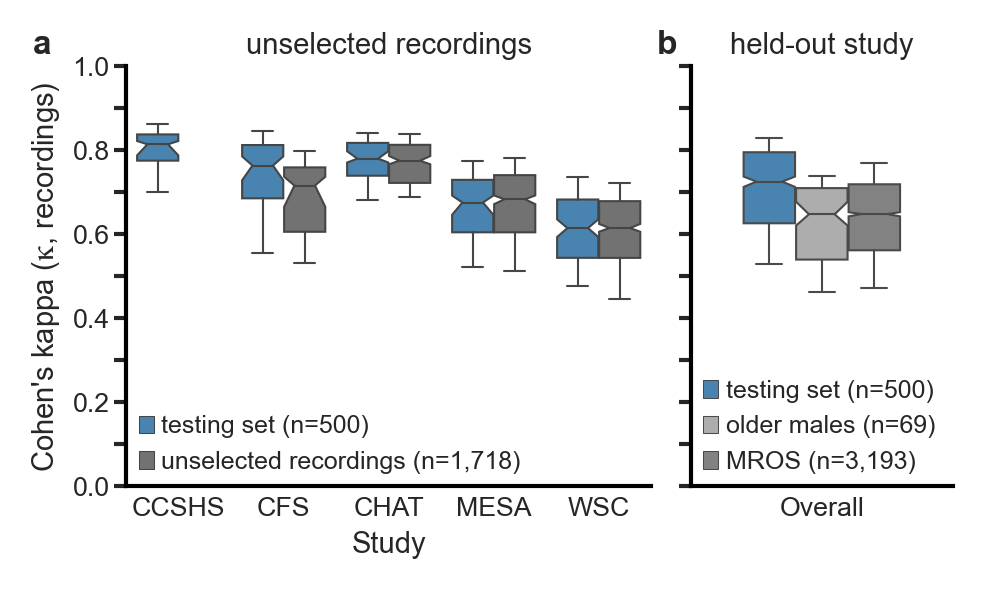

In [5]:

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.5])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])




### a
remain_palette = [main_palette[0]]
remain_palette += [sns.color_palette("Greys", 7)[4]]

ax = sns.boxplot(y='value', x='study', hue='subset', data=data_remain_all[data_remain_all['variable']=='All'], 
            whis=[10, 90], 
    #   hue_order=hue_order,
      width=0.8,
      palette=remain_palette,
      notch=True, bootstrap=n_boot,
      ax=ax1,
      saturation=1,
      showfliers=False, linewidth=0.5)


ax1.set_ylim([0, 1])
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

for label in ax1.get_yticklabels()[1::2]:
    label.set_visible(False)

sns.despine(ax=ax1, right=True, top=True, bottom=False)
ax1.grid(False)
ax1.tick_params(axis='y', left=True, width=1, length=3, pad=1)
# ax1.tick_params(axis='x', bottom=True, width=1, length=3, pad=1)
for tick in ax1.get_xticklabels():
    tick.set_verticalalignment("bottom")

labelpad = 2.5
ax1.set_ylabel('Cohen\'s kappa ($\kappa$, recordings)', fontweight=None, labelpad=labelpad)
ax1.set_xlabel('Study', fontweight=None, labelpad=labelpad)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, 
    title='', 
    title_fontproperties={'weight':None, 'size': 6}, 
    loc='lower left',
    alignment='left',
    borderpad=0,
    handletextpad=0.3,
    handlelength=0.6,
    fontsize=6)


### b

palette = []
palette += [main_palette[0]]
palette += [sns.color_palette("Greys", 6)[2]]
palette += [sns.color_palette("Greys", 6)[3]]
palette += [sns.color_palette("Greys", 6)[4]]

sns.boxplot(y='value', x='variable', hue='study', data=data_all[data_all.variable=='Overall'], whis=[10, 90], 
      width=0.6,
      palette=palette,
      notch=True, bootstrap=n_boot,
      ax = ax2,
      saturation=1,
      showfliers=False, linewidth=0.5)

labelpad = 2.5
ax2.set_ylabel('', fontweight=None, labelpad=labelpad)
ax2.set_xlabel('', fontweight=None, labelpad=labelpad)
ax2.set_ylim([0, 1])
ax2.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

for label in ax2.get_yticklabels():
    label.set_visible(False)

sns.despine(ax=ax2, right=True, top=True, bottom=False)
ax2.grid(False)
ax2.tick_params(axis='y', left=True, width=1, length=3, pad=1)

for tick in ax2.get_xticklabels():
    tick.set_verticalalignment("bottom")

handles, labels = ax2.get_legend_handles_labels()
labels = ['testing set (n=500)', 'older males (n=69)', 'MROS (n=3,193)']
ax2.legend(handles=handles, labels=labels, framealpha=1, 
          title='',
          title_fontproperties={'weight':None, 'size': 6},
          alignment='left',
          loc='lower left',
          fontsize=6, ncol=1,
          borderpad=0,
          handlelength=0.6,
          handletextpad=0.3,
          columnspacing=1)

i = 0
for child in ax2.get_children():
    try:
        if child._label == '':
            facecolor = child._facecolor
            if abs(facecolor[0] - main_palette[0][0]) < 0.01:
                color_i = i % 6
                if i > 0:
                    child.set_facecolor(main_palette[color_i])
                i += 1
    except:
        pass
i = 0
for child in ax2.get_children():
    try:
        if child._label == '':
            facecolor = child._facecolor
            if abs(facecolor[0] - stage_cmaps[0][2][0]) < 0.01:
                color_i = i % 6
                if i > 0:
                    child.set_facecolor(stage_cmaps[color_i][2])
                i += 1
    except:
        pass

### panel labels
panel_label_y = 1.05
panel_label_x = -0.16
panel_fontsize = 8

ax1.text(panel_label_x, panel_label_y, 'a', transform=ax1.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')
ax2.text(-0.09, panel_label_y, 'b', transform=ax2.transAxes,
      fontsize=panel_fontsize, fontweight='bold', va='center', ha='center')


panel_title_x = 0.5
title_fontsize = 7
ax1.text(panel_title_x, panel_label_y, 'unselected recordings', transform=ax1.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')
ax2.text(panel_title_x, panel_label_y, 'held-out study', transform=ax2.transAxes,
      fontsize=title_fontsize, fontweight=None, va='center', ha='center')


plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.1)
figure_standard.scale_figure_by_axes(ax1, 1.4, 1.75)

# save the figure
filename = os.path.basename(globals()["__vsc_ipynb_file__"]).replace(".ipynb", "")
figure_standard.save_figure_files(filename)